# Build a Sudoku Solver

I have created a simple project where I have built an intelligent agent that will solve every sudoku which uses two very important tecniques used in A.I. :
- Constraint propagation
- Search techniques

In [1]:
from functions import *
%matplotlib inline

<h2> Naming conventions</h2>

- The 9 rows will be labelled by the letters A, B, C, D, E, F, G, H, I.
- The 9 columns will be labelled by the numbers 1, 2, 3, 4, 5, 6, 7, 8, 9.
- Boxes: Each intersection of row and column will be called box. These boxes will have labels 'A1', 'A2', …, 'I9'.
- Units: The complete rows, columns, and 3x3 squares, will be called units. Thus, each unit is a set of 9 boxes, and there are 27 units in total.
- Peers: For a particular box (such as 'A1'), its peers will be all other boxes that belong to a common unit (namely, those that belong to the same row, column, or 3x3 square).

The file [utils.py](utils.py) contains codes to extract peers for each cell and display the grids.

In [2]:
row_units = [cross(r, cols) for r in rows]
column_units = [cross(rows, c) for c in cols]
square_units = [cross(rs, cs) for rs in ('ABC','DEF','GHI') for cs in ('123','456','789')]
unitlist = row_units + column_units + square_units

unitlist = unitlist
units = extract_units(unitlist, boxes)
peers = extract_peers(units, boxes)

## Constaint Propagation


Constraint Propagation is all about using local constraints in a space (in the case of Sudoku, the constraints of each square) to dramatically reduce the search space. As we enforce each constraint, we see how it introduces new constraints for other parts of the board that can help us further reduce the number of possibilities.

<h2>1. Eliminate strategy</h2>

In Sudoku, a box  cannot have a value already present in its peers.<br>
Therefore we go over every box that has doesn't has a value, and eliminate that values from  its peers's possible values.<br>
The function takes a dictionary with every box(A1,A2,etc) as key and its value (or possible values) as the value.
It returns the values dictionary with the assigned values eliminated from peers.

In [3]:
def eliminate(values):
    for x in peers:
        if len(values[x])== 1:
            digit =values[x]
            for peer in peers[x]:
                values[peer]=values[peer].replace(digit,"")
                    
    return values

<h2>2. Only Choice</h2>

 The only choice strategy says that if only one box in a unit allows a certain digit, then that box must be assigned that digit.

In [4]:
def only_choice(values):
    
    for unit in unitlist:
        for digit in '123456789':
            boxeswithdigit=[x for x in unit if digit in values[x]]
            if(len(boxeswithdigit)==1):
                #values[boxeswithdigit[0]]=digit
                assign_value(values, boxeswithdigit[0], digit)
            
    return values

<h2>3. Naked Twins Technique</h2>

Popular technique to remove possibilities. It says that if 2 boxes which are peers, have the same 2 possible values, then those values are locked in those two boxes, and hence can be removed from their peers.
<img src='images/nakedtwins.png' width=400px>

In [5]:
def naked_twins(values):
    for unit in unitlist:
        
        s = set()
        for x in unit:
            if(len(values[x])==2):
                if values[x] not in s:
                    s.add(values[x])
                else:
                    val = values[x]
                    for digit in val:
                        for  z in unit:
                            if(values[z]!= val):
                                values[z]= values[z].replace(digit,'')                              
    return values           

<h2>Reduce Puzzle</h2>

Reduce the Sudoku puzzle by repeatedly applying all these constraint strategies.

In [6]:
def reduce_puzzle(values):
    running = True
    while running==True:
        solved_values_before = len([box for box in values.keys() if len(values[box]) == 1])
        values = eliminate(values)
        values = only_choice(values)
        values = naked_twins(values)
        solved_values_after = len([box for box in values.keys() if len(values[box]) == 1])
        #print("before:"+ str(solved_values_before)+"  after: "+str(solved_values_after))
        if solved_values_after==solved_values_before:
            running =False
        
        if len([box for box in values.keys() if len(values[box]) == 0]):
            return False
    
    return values  

## Search

If the puzzle is still not solved using constraints, we apply Search on the least difficult box for all its *possible values* 
and the one that solves the problem is kept.

Here we apply Depth First Search.

In [7]:
def search(values):

    # First, reduce the puzzle using the previous function
    values =reduce_puzzle(values)
    if values is False:
        return False
    if all(len(values[s]) == 1 for s in boxes):
        return values#Solved
    # Choose one of the unfilled squares with the fewest possibilities
    l=[s for s in boxes if len(values[s])>1]
    z= min(l)
    # Now use recursion to solve each one of the resulting sudokus, and if one returns a value (not False), return that answer!
    for digit in values[z]:
        new_val = values.copy()
        #new_val[z]=digit
        assign_value(new_val, z, digit)
        attempt = search(new_val)
        if attempt:
            return attempt

## Solve
Find the solution to the Sudoku puzzle using all these techniques.

In [8]:
def solve(grid):
    values = grid2values(grid)
    values = search(values)
    return values

## Input

We take the input sudoku as a /string with continuous values row by row and '.'representing empty spaces.

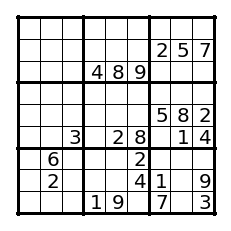

In [9]:
sudoku_grid = '...............257...489..................582..3.28.14.6...2....2...41.9...19.7.3'
#'48...2....5.......71..5..3...5....9.39.178.42.2....7...3..1..29.......8....6...17'
#'2.............62....1....7...6..8...3...9...7...6..4...4....8....52.............3'
plot_sudoku(grid2values(sudoku_grid))

## Output

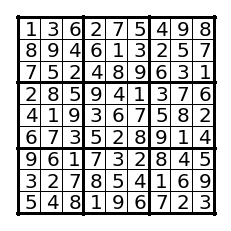

In [10]:
result = solve(sudoku_grid)
plot_sudoku(result)